# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

Write the problem statement and objectives here


### Data Dictionary

Mention the data dictionary here

### Let us start by importing the required libraries

In [198]:
# Write your code here to import necessary libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='IPython.core.events') # got this from Glaide I am getting warnings on fonts 

### Understanding the structure of the data

In [7]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# Write your code here to read the data
df = pd.read_csv("foodhub_order.csv")

In [9]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### Clening up few data points

In [11]:
# Convert the 'rating' column from string to numeric.
# "Not given" into NaN, which allows us to treat them as missing data.
df['numeric_rating'] = pd.to_numeric(df['rating'], errors='coerce')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,numeric_rating
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5.0
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3.0
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4.0


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [13]:
# Write your code here
print(df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

(1898, 10)
Number of rows: 1898
Number of columns: 10


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [16]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   numeric_rating         1162 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 148.4+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [19]:
# Write your code here
missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)

Missing values in each column:
order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                     0
food_preparation_time      0
delivery_time              0
numeric_rating           736
dtype: int64


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [22]:
# Write your code here

df['food_preparation_time'].describe()

min_time = df['food_preparation_time'].min()
mean_time = df['food_preparation_time'].mean()
max_time = df['food_preparation_time'].max()

print("Minimum food preparation time:", min_time)
print("Average food preparation time:", mean_time)
print("Maximum food preparation time:", max_time)

Minimum food preparation time: 20
Average food preparation time: 27.371970495258168
Maximum food preparation time: 35


### **Question 5:** How many orders are not rated? [1 mark]

In [25]:
# In terms of rating
df['rating'].describe()
unrated_count = df[df['rating'] == 'Not given'].shape[0]
print("Number of not-rated orders:", unrated_count)

Number of not-rated orders: 736


In [26]:
# In terms of numeric rating
df['numeric_rating'].describe()
unrated_count = df['numeric_rating'].isnull().sum()
print("Number of not-rated (NaN) orders:", unrated_count)

Number of not-rated (NaN) orders: 736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Numeric vs Categorical

#### Numeric:

##### cost_of_the_order (float)
##### food_preparation_time (int)
##### delivery_time (int)
##### numeric_rating (float)

#### Categorical:

##### restaurant_name (object/string)
##### cuisine_type (object/string)
##### day_of_the_week (object/string)
##### rating (object/string — includes “Not given”)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   numeric_rating         1162 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 148.4+ KB


### Numeric Columns:

#### Cost Of The Order

In [35]:
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

#### Histogram

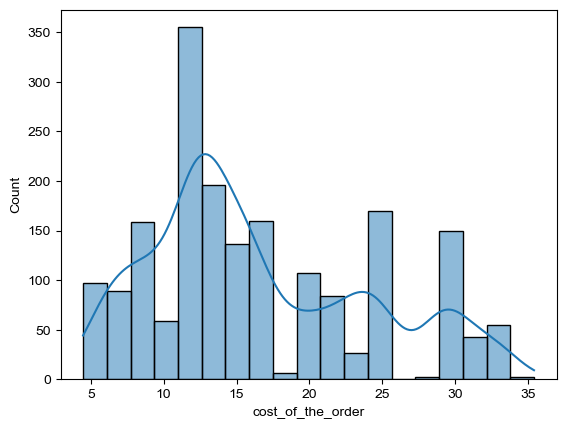

In [37]:
sns.histplot(df['cost_of_the_order'], kde=True);

#### Box Plot

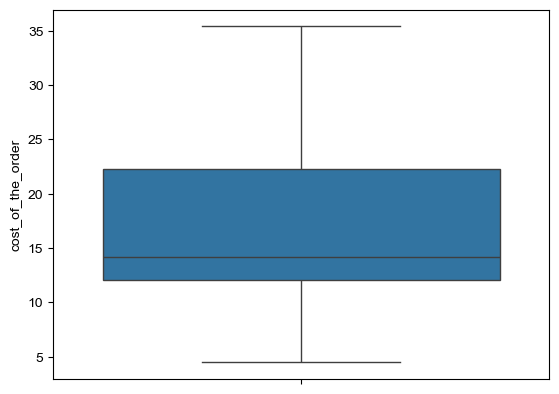

In [39]:
sns.boxplot(y=df['cost_of_the_order']);

### Food Preparation Time:

In [41]:
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Histogram

<Axes: xlabel='food_preparation_time', ylabel='Count'>

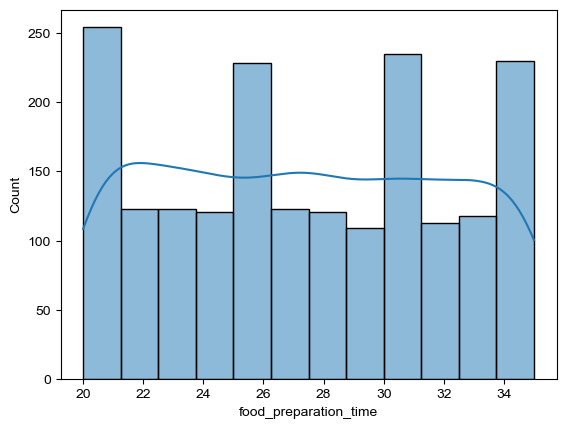

In [143]:
sns.histplot(df['food_preparation_time'], kde=True)

#### Box Plot

<Axes: ylabel='food_preparation_time'>

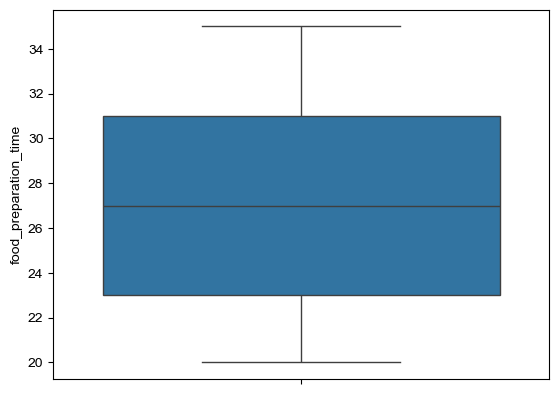

In [45]:
sns.boxplot(y=df['food_preparation_time'])

### Delivery Time:

In [47]:
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

### Histogram:

<Axes: xlabel='delivery_time', ylabel='Count'>

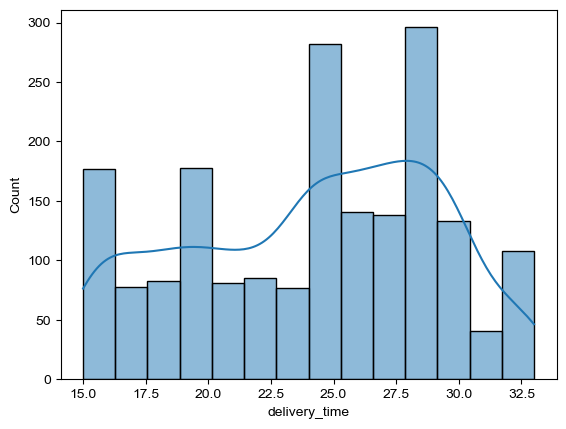

In [49]:
sns.histplot(df['delivery_time'], kde=True)

### Boxplot:

<Axes: ylabel='delivery_time'>

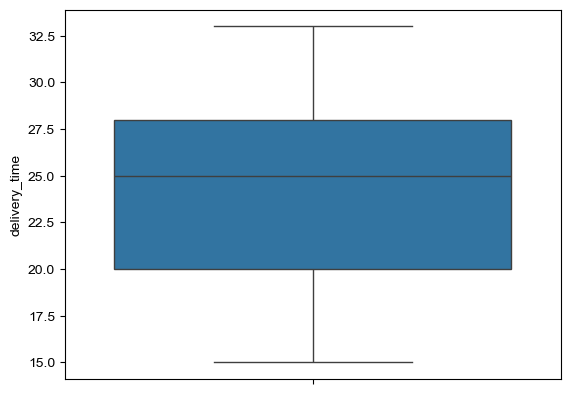

In [51]:
sns.boxplot(y=df['delivery_time'])

### Numeric Rating 

In [53]:
df['numeric_rating'].describe()

count    1162.000000
mean        4.344234
std         0.741478
min         3.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: numeric_rating, dtype: float64

### Histogram:

<Axes: xlabel='numeric_rating', ylabel='Count'>

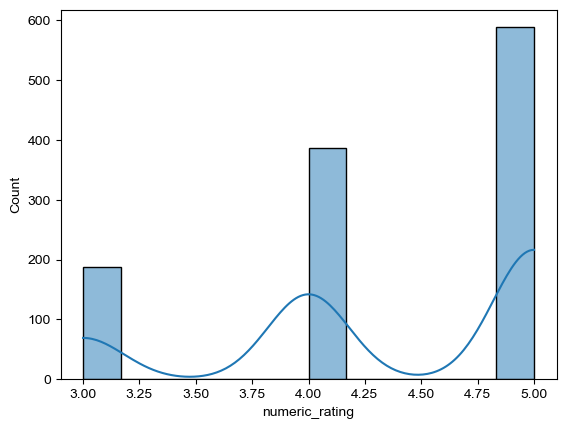

In [55]:
sns.histplot(df['numeric_rating'], kde=True)

### Boxplot:

<Axes: ylabel='numeric_rating'>

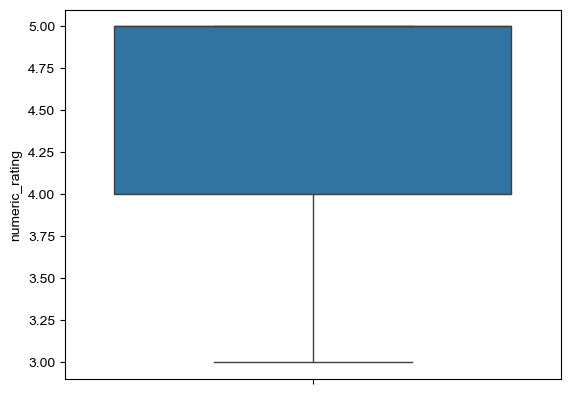

In [57]:
sns.boxplot(y=df['numeric_rating'])

## Categorical Columns:

### Restaurant Name

In [193]:
df['restaurant_name'].describe()

count            1898
unique            178
top       Shake Shack
freq              219
Name: restaurant_name, dtype: object

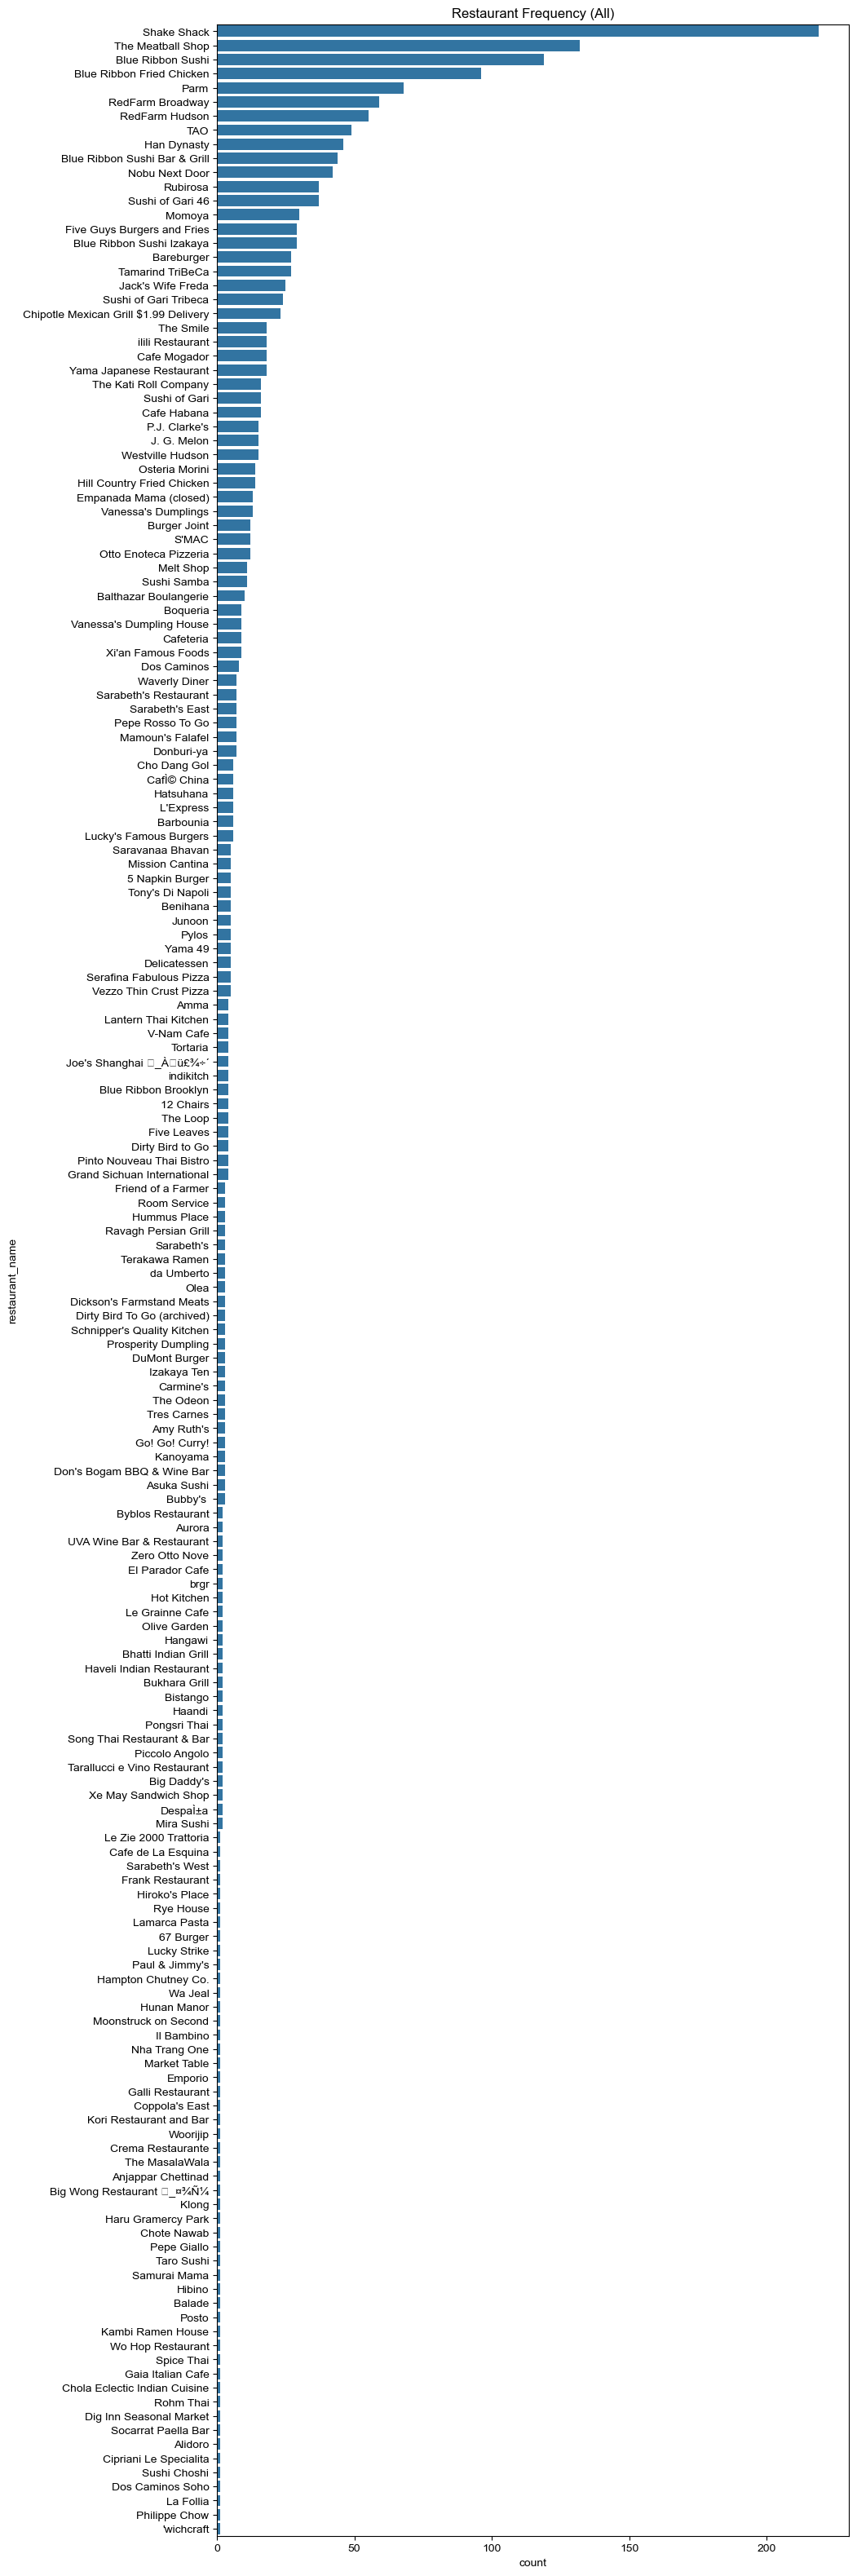

In [225]:
plt.figure(figsize=(10, 40))
sns.countplot(y='restaurant_name', 
              data=df, 
              order=df['restaurant_name'].value_counts().index)
plt.title("Restaurant Frequency (All)")
plt.show()

### Cuisine Type

In [202]:
df['cuisine_type'].describe()

count         1898
unique          14
top       American
freq           584
Name: cuisine_type, dtype: object

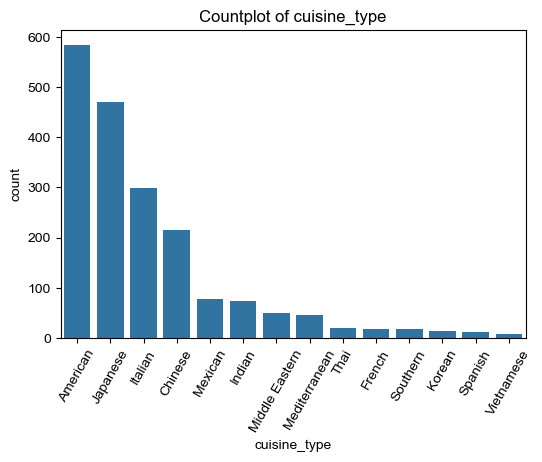

In [218]:
plt.figure(figsize=(6,4))
sns.countplot(x='cuisine_type', data=df, order=df['cuisine_type'].value_counts().index)
plt.title("Countplot of cuisine_type")
plt.xticks(rotation=60)
plt.show()

### Day of the week

In [221]:
df['day_of_the_week'].describe()

count        1898
unique          2
top       Weekend
freq         1351
Name: day_of_the_week, dtype: object

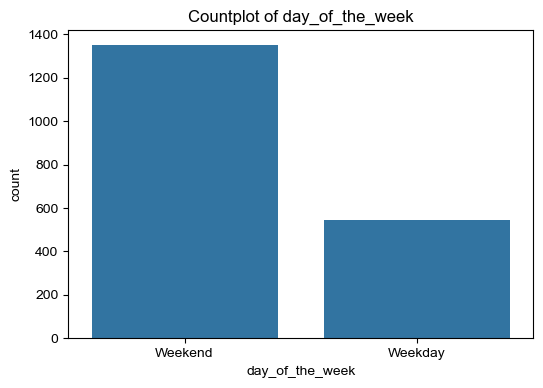

In [227]:
plt.figure(figsize=(6,4))
sns.countplot(x='day_of_the_week', data=df, order=df['day_of_the_week'].value_counts().index)
plt.title("Countplot of day_of_the_week")
plt.show()

### Rating (Original text-based rating)

In [230]:
df['rating'].describe()

count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object

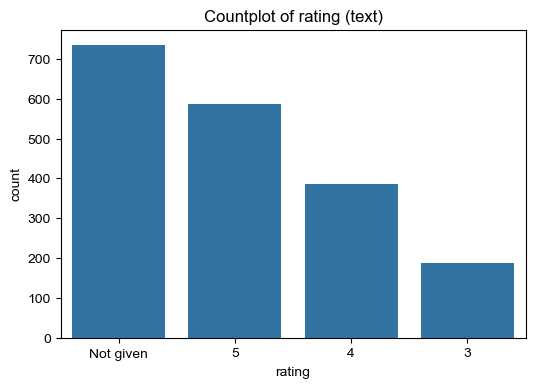

In [232]:
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Countplot of rating (text)")
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [244]:
# Write the code here
restaurant_counts = df['restaurant_name'].value_counts()
top_5_restaurants = restaurant_counts.head()
print("Top 5 Restaurants by Number of Orders:")
print(top_5_restaurants)

Top 5 Restaurants by Number of Orders:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


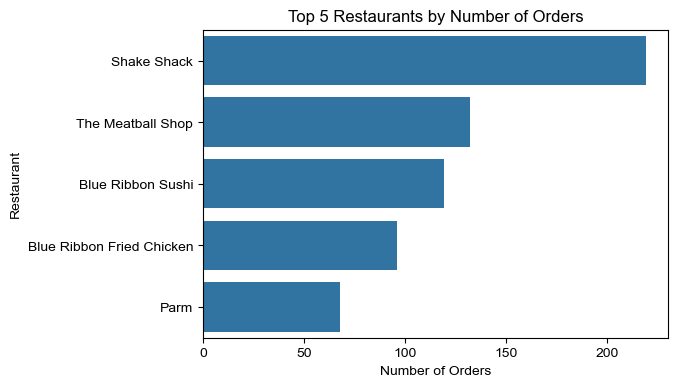

In [291]:
plt.figure(figsize=(6, 4))
sns.barplot(x=top_5_restaurants.values, 
            y=top_5_restaurants.index)
plt.title("Top 5 Restaurants by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Restaurant")
plt.show()

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [274]:
# Write the code here
df_weekend = df[df['day_of_the_week'] == 'Weekend']
weekend_cuisine_counts = df_weekend['cuisine_type'].value_counts()
top_5_weekend = weekend_cuisine_counts.head(5)
most_popular_cuisine = top_5_weekend.index[0]
print("Most popular cuisine on weekends:", most_popular_cuisine)

Most popular cuisine on weekends: American


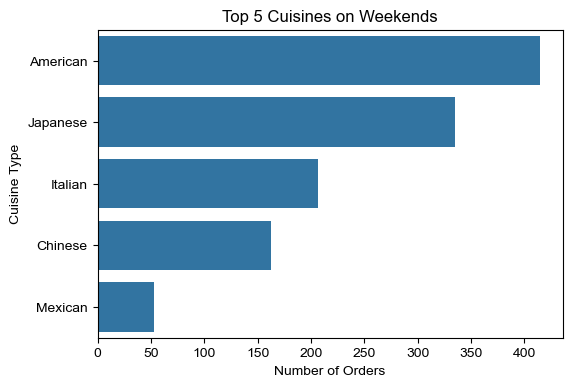

In [289]:
plt.figure(figsize=(6,4))
sns.barplot(x=top_5_weekend.values,
            y=top_5_weekend.index, )
plt.title("Top 5 Cuisines on Weekends")
plt.xlabel("Number of Orders")
plt.ylabel("Cuisine Type")
plt.show()

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [279]:
# Write the code here
above_20_count = df[df['cost_of_the_order'] > 20].shape[0]
total_orders = df.shape[0]
percentage_above_20 = (above_20_count / total_orders) * 100
print(f"Number of orders costing more than $20: {above_20_count}")
print(f"Percentage of orders costing more than $20: {percentage_above_20:.2f}%")

Number of orders costing more than $20: 555
Percentage of orders costing more than $20: 29.24%


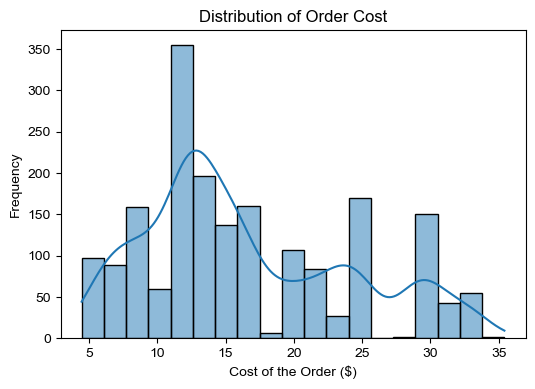

In [287]:
plt.figure(figsize=(6,4))
sns.histplot(df['cost_of_the_order'], kde=True)
plt.title("Distribution of Order Cost")
plt.xlabel("Cost of the Order ($)")
plt.ylabel("Frequency")
plt.show()

### **Question 10**: What is the mean order delivery time? [1 mark]

In [295]:
# Write the code here
print("Delivery Time Summary:")
print("Mean:", df['delivery_time'].mean())
print("Median:", df['delivery_time'].median())
print("Min:", df['delivery_time'].min())
print("Max:", df['delivery_time'].max())
print("Mode:", df['delivery_time'].mode())

Delivery Time Summary:
Mean: 24.161749209694417
Median: 25.0
Min: 15
Max: 33
Mode: 0    24
Name: delivery_time, dtype: int64


In [297]:
print("Mean:", df['delivery_time'].mean())

Mean: 24.161749209694417


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [305]:
# Write the code here
customer_order_counts = df['customer_id'].value_counts()
top_3_customers = customer_order_counts.head(3)
print("Top 3 Most Frequent Customers (Customer ID: Number of Orders):")
print(top_3_customers)

Top 3 Most Frequent Customers (Customer ID: Number of Orders):
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### 1. Correlation Heatmap

<Axes: >

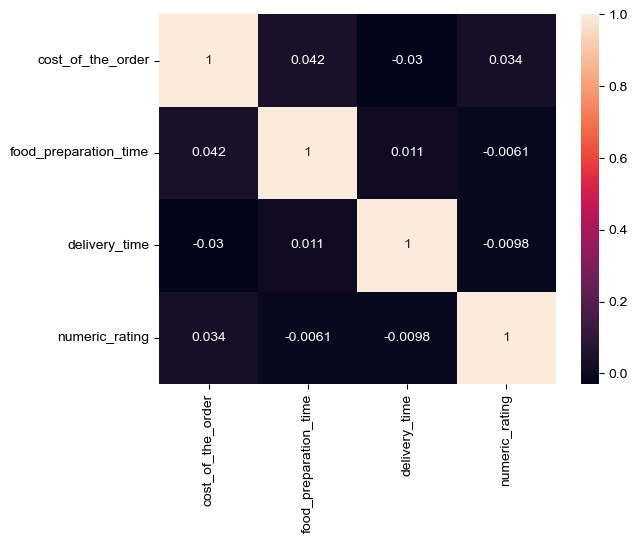

In [341]:
corr_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'numeric_rating']].corr()
sns.heatmap(corr_matrix, annot=True)

### 2. Scatter Plot: Food Preparation Time vs. Delivery Time

<Axes: xlabel='food_preparation_time', ylabel='delivery_time'>

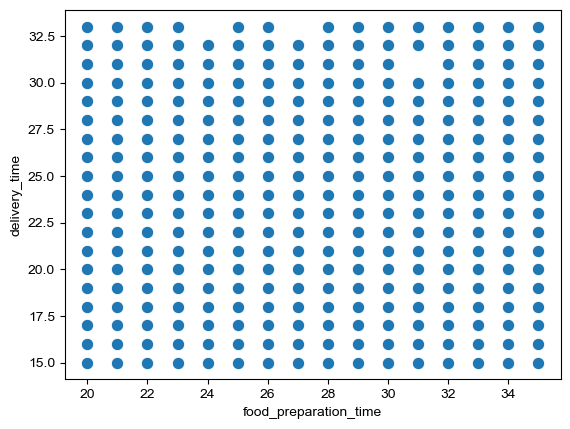

In [335]:
sns.scatterplot(data=df, 
                x='food_preparation_time', 
                y='delivery_time',
                s=80)

### 3. Scatter Plot: Cost of the Order vs. Delivery Time

<Axes: xlabel='cost_of_the_order', ylabel='delivery_time'>

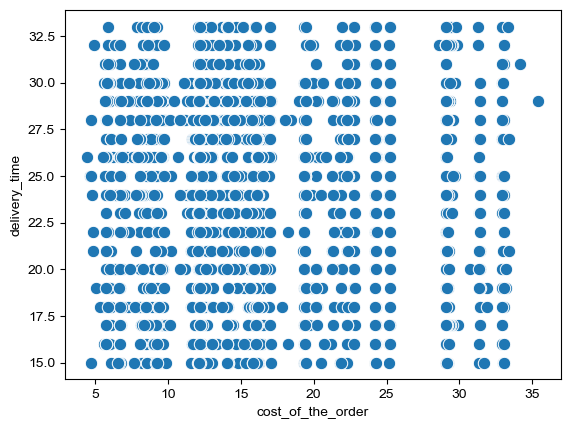

In [348]:
sns.scatterplot(data=df, 
                x='cost_of_the_order', 
                y='delivery_time',
                s=80)

### 4. Box Plot: Cost of the Order by Day of the Week

<Axes: xlabel='day_of_the_week', ylabel='cost_of_the_order'>

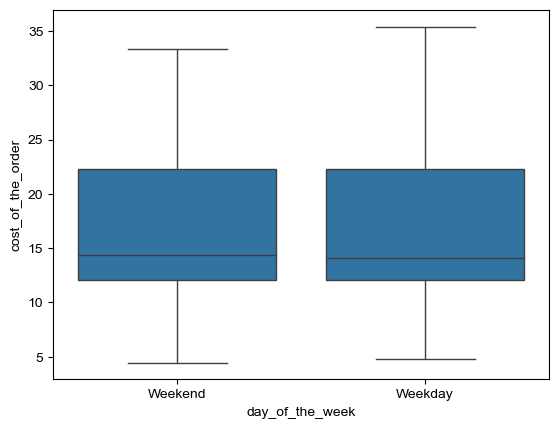

In [366]:
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)

### 5. Box Plot: Numeric Rating by Cuisine Type

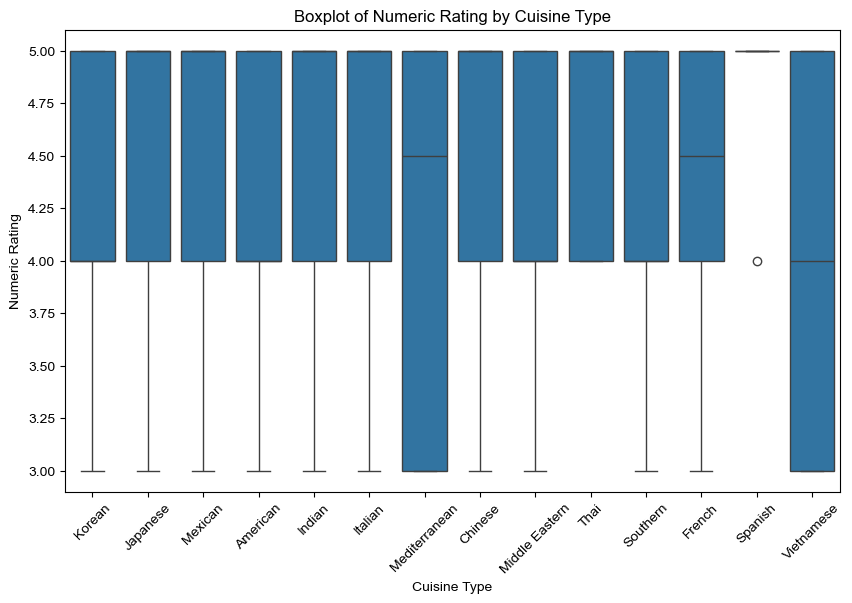

In [372]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cuisine_type', y='numeric_rating', data=df)
plt.title("Boxplot of Numeric Rating by Cuisine Type")
plt.xlabel("Cuisine Type")
plt.ylabel("Numeric Rating")
plt.xticks(rotation=45)
plt.show()

### 6. Pair Plot of Numerical Variables

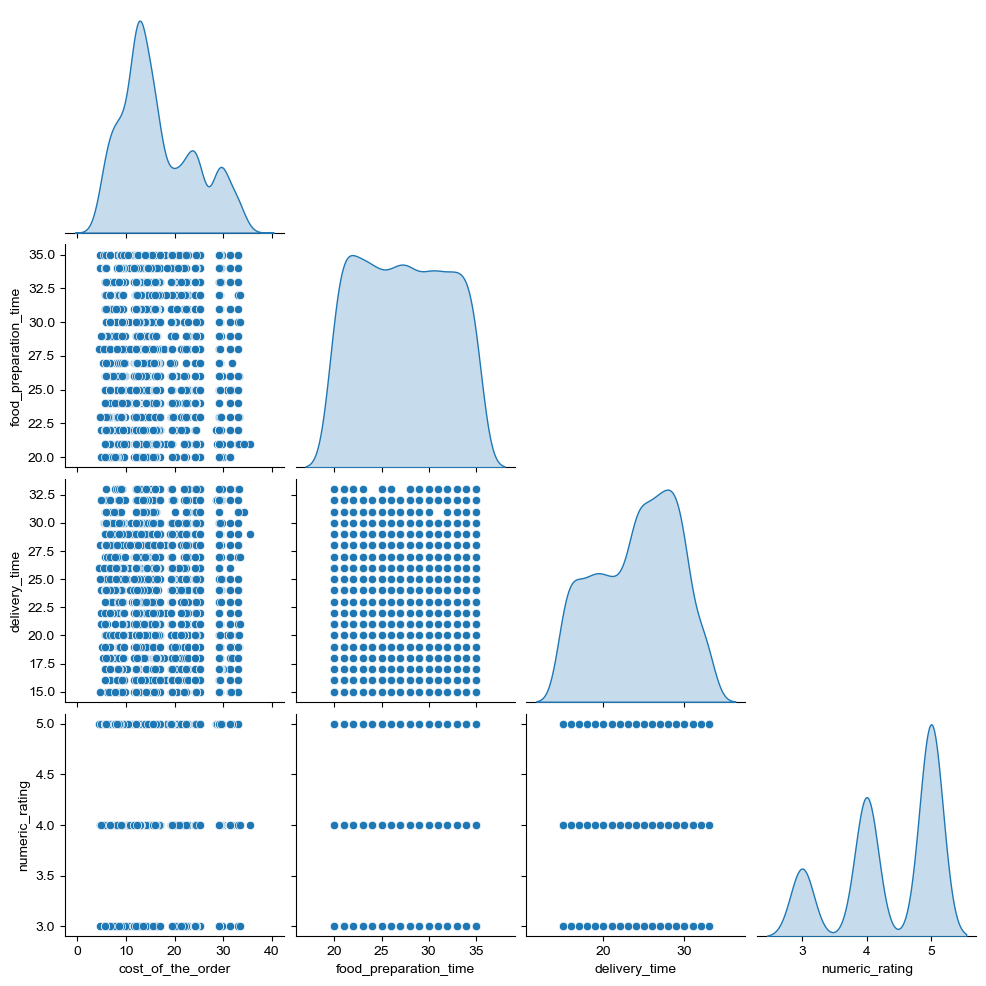

In [374]:
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'numeric_rating']], diag_kind='kde', corner=True)

### 7. Cost of the Order by Cuisine Type

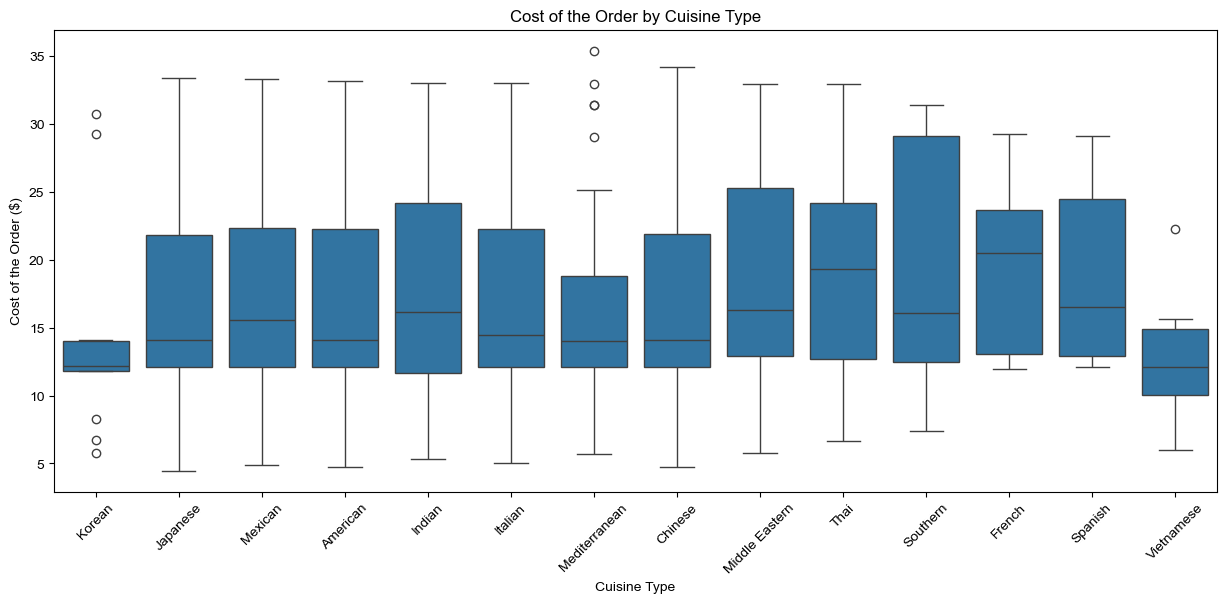

In [387]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title("Cost of the Order by Cuisine Type")
plt.xlabel("Cuisine Type")
plt.ylabel("Cost of the Order ($)")
plt.xticks(rotation=45)
plt.show()

### 8. Box Plot: Delivery Time by Cuisine Type

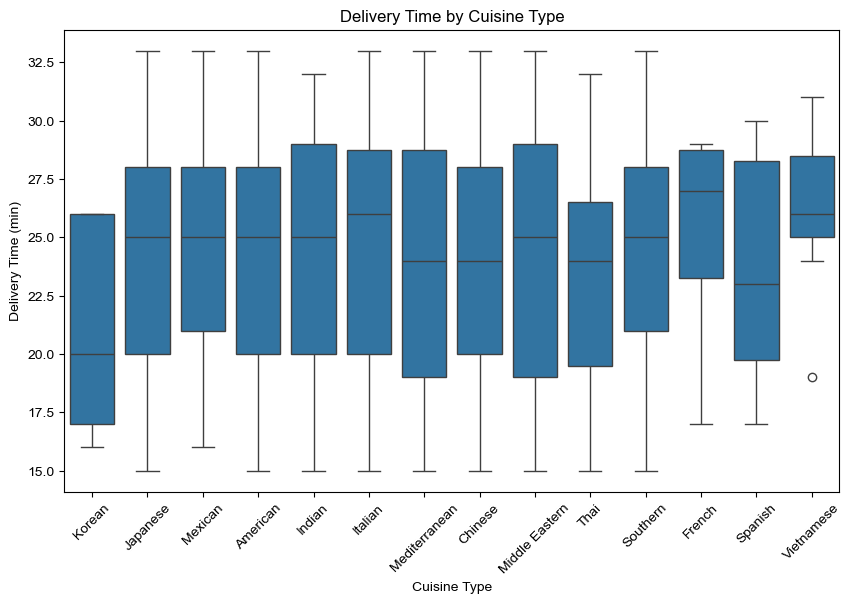

In [391]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cuisine_type', y='delivery_time', data=df)
plt.title("Delivery Time by Cuisine Type")
plt.xlabel("Cuisine Type")
plt.ylabel("Delivery Time (min)")
plt.xticks(rotation=45)
plt.show()

### 9. Delivery Time by Restaurant

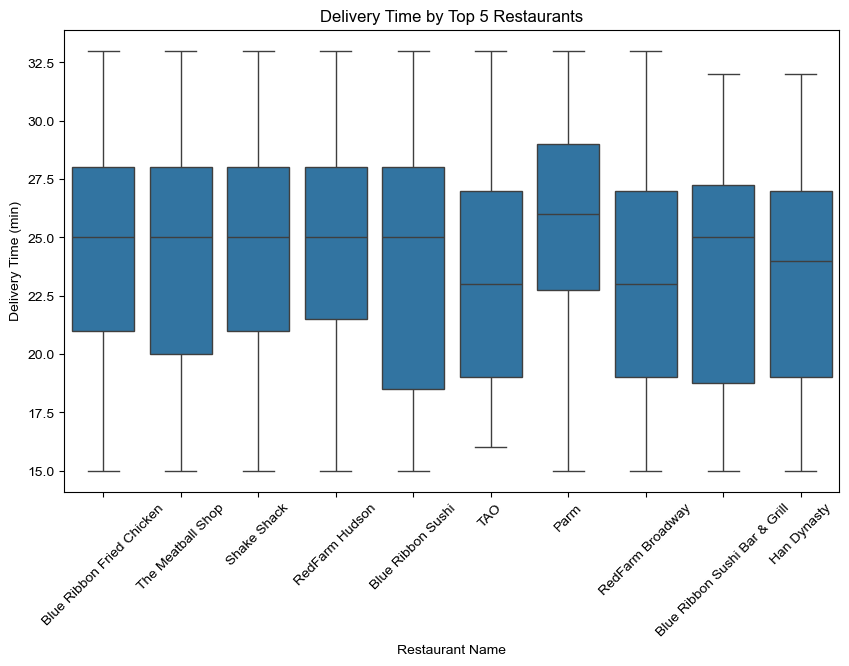

In [396]:
top_10_restaurants = df['restaurant_name'].value_counts().head(10).index
df_top_restaurants = df[df['restaurant_name'].isin(top_10_restaurants)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='restaurant_name', y='delivery_time', data=df_top_restaurants)
plt.title("Delivery Time by Top 5 Restaurants")
plt.xlabel("Restaurant Name")
plt.ylabel("Delivery Time (min)")
plt.xticks(rotation=45)
plt.show()

### 10. Delivery Time by Day

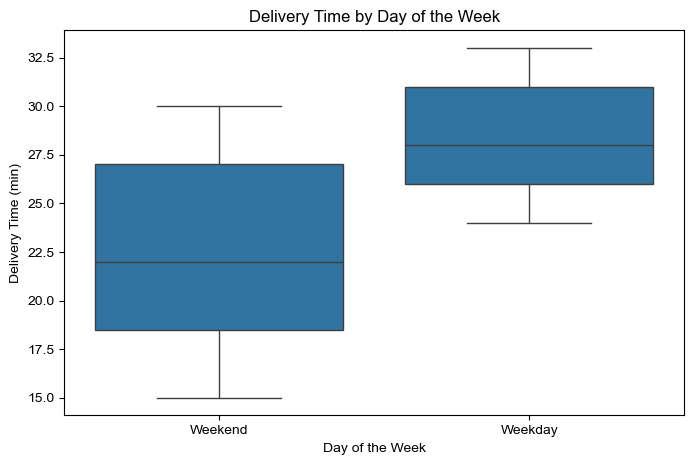

In [400]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title("Delivery Time by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Delivery Time (min)")
plt.show()

### 11. Delivery Time by Restaurant

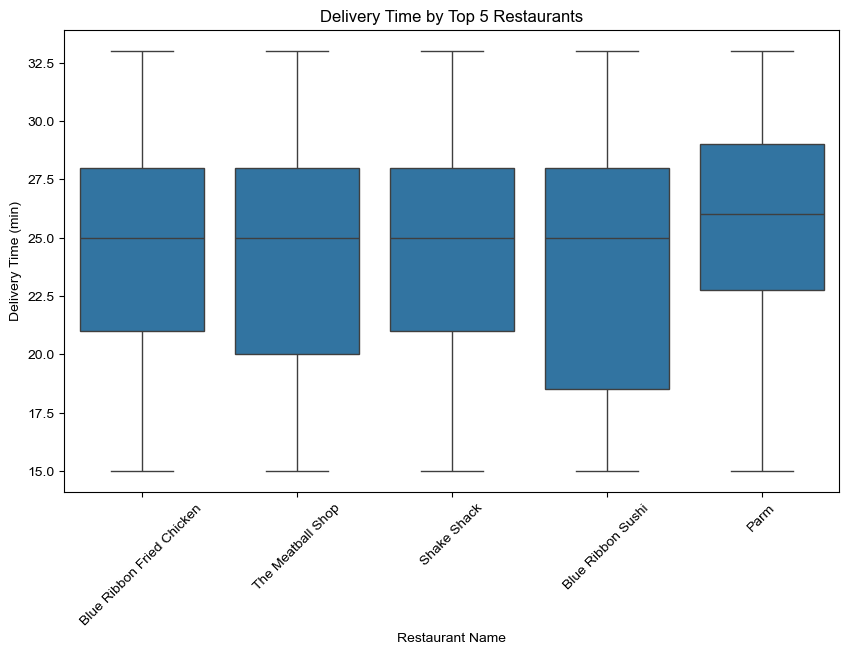

In [404]:
top_5_restaurants = df['restaurant_name'].value_counts().head(5).index
df_top_restaurants = df[df['restaurant_name'].isin(top_5_restaurants)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='restaurant_name', y='delivery_time', data=df_top_restaurants)
plt.title("Delivery Time by Top 5 Restaurants")
plt.xlabel("Restaurant Name")
plt.ylabel("Delivery Time (min)")
plt.xticks(rotation=45)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [408]:
# Write the code here
# Group by restaurant_name and calculate the rating count and average rating using numeric_rating
restaurant_ratings = df.groupby("restaurant_name")["numeric_rating"].agg(["count", "mean"])
# Rename the columns for clarity
restaurant_ratings = restaurant_ratings.rename(columns={"count": "rating_count", "mean": "average_rating"})
# Filter restaurants that have more than 50 ratings and an average rating above 4
promotional_restaurants = restaurant_ratings[(restaurant_ratings["rating_count"] > 50) & 
                                               (restaurant_ratings["average_rating"] > 4)]
print("Restaurants eligible for the promotional offer:")
print(promotional_restaurants)

Restaurants eligible for the promotional offer:
                           rating_count  average_rating
restaurant_name                                        
Blue Ribbon Fried Chicken            64        4.328125
Blue Ribbon Sushi                    73        4.219178
Shake Shack                         133        4.278195
The Meatball Shop                    84        4.511905


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

### Compute comission for each orders

In [417]:
# Write the code here
df['commission'] = np.where(df['cost_of_the_order'] > 20, 
                            df['cost_of_the_order'] * 0.25, 
                            np.where(df['cost_of_the_order'] > 5,
                                     df['cost_of_the_order'] * 0.15,
                                     0))
df['commission'].describe()

count    1898.000000
mean        3.248842
std         2.295598
min         0.000000
25%         1.812000
50%         2.121000
75%         5.574375
max         8.852500
Name: commission, dtype: float64

### Calculate the Net Revenue

In [420]:
net_revenue = df['commission'].sum()
print("Net Revenue Generated by the Company: $", net_revenue)

Net Revenue Generated by the Company: $ 6166.303


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [424]:
# Write the code here
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
orders_over_60 = df[df['total_delivery_time'] > 60].shape[0]
total_orders = df.shape[0]
percentage_over_60 = (orders_over_60 / total_orders) * 100
print(f"Percentage of orders taking more than 60 minutes: {percentage_over_60:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [426]:
# Write the code here
mean_delivery_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()
print("Mean Delivery Time by Day:")
print(mean_delivery_by_day)

Mean Delivery Time by Day:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


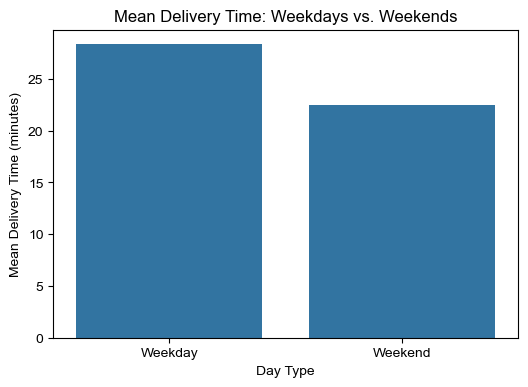

In [430]:
plt.figure(figsize=(6,4))
sns.barplot(x=mean_delivery_by_day.index, y=mean_delivery_by_day.values)
plt.title("Mean Delivery Time: Weekdays vs. Weekends")
plt.xlabel("Day Type")
plt.ylabel("Mean Delivery Time (minutes)")
plt.show()

#### Observations:
* The data shows that orders on weekdays take longer to deliver compared to weekends by roughly 6 minutes. This could be due to factors such as higher traffic during weekdays, increased order volume, or different operational dynamics on weekdays versus weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Analysis shows that there is very little linear connection between the order cost, food preparation time, delivery time, and customer ratings. This means that a higher order cost does not necessarily lead to better or worse ratings, and longer food preparation does not always result in longer delivery times.
* Found that the mean delivery time on weekdays is about 28.34 minutes, whereas on weekends it is about 22.47 minutes. This indicates that orders on weekdays take, on average, around 6 minutes longer to deliver than those on weekends.
* While the overall ratings are high, some differences exist between cuisines. Certain cuisines may consistently receive higher ratings, suggesting that customers appreciate the quality of service provided by those restaurants.
* Since ratings are not strongly tied to cost or delivery speed, other factors—such as food quality, taste, presentation, and customer service—might be more influential in determining customer satisfaction.

### Recommendations:
### Improve Weekday Delivery Efficiency:
* Since orders take longer on weekdays, the company could review delivery routes or adjust staffing during busy weekday periods. Improving logistics on weekdays may help reduce delivery time and enhance customer satisfaction.
### Promote Top-Rated Cuisines:
* Use the insights on cuisine type to promote restaurants that consistently receive high ratings. Special advertisements or offers highlighting these cuisines can attract more customers.
### Investigate Low-Rated Areas:
* For restaurants or cuisines with lower ratings or high variability in ratings, consider further investigation.
### Encourage Detailed Feedback:
* To understand what drives customer satisfaction beyond just cost and delivery speed, encourage customers to provide detailed feedback. This can help identify areas for improvement in food quality or service.
### Tailor Promotions:
* Based on the findings, promotions or discount vouchers could be targeted not only based on the number of orders but also by focusing on restaurants with high ratings. 